### Autoencoders

In [1]:
import torch 
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

In [48]:
EPOCH = 5
LR = 0.005
DOWNLOAD_DATA = False if os.path.exists("./data") or os.listdir("/data") else True
BATCH_SIZE = 50

In [49]:
train_data = MNIST(
    root="data",
    train=True,
    download=DOWNLOAD_DATA,
    transform=ToTensor(),
)

test_data = MNIST(
    root="data",
    train=False,
    download=DOWNLOAD_DATA,
    transform=ToTensor(),
)

In [50]:
train_loader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_loader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

In [51]:
for tr, te in zip(train_loader, test_loader):
    print(tr[0].shape, tr[1].shape, te[0].shape, te[1].shape)
    print(tr[0].view(-1, 28, 28).shape)
    # print(tr)
    break

torch.Size([50, 1, 28, 28]) torch.Size([50]) torch.Size([50, 1, 28, 28]) torch.Size([50])
torch.Size([50, 28, 28])


In [52]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoder = self.encoder(x)
        decoder = self.decoder(encoder)
        return decoder, encoder


In [53]:
autoencoder = Net()
loss_fn = nn.MSELoss()
optim = torch.optim.Adam(autoencoder.parameters(), lr=LR)

In [58]:
def train(dataloader, model, loss_fn, optim):
    size = len(dataloader.dataset)
    # print(dataloader)
    for step, (x, y) in enumerate(dataloader):
        b_x = x.view(-1, 28*28)
        b_y = x.view(-1, 28*28)
        
        # print(b_x.shape)
        decode = model(b_x)
        # print(decode)
        loss = loss_fn(decode[0], b_y)
        optim.zero_grad()
        loss.backward()
        optim.step()
        if step % 50 == 0:
            # loss, current = loss.item(), step * len(x)
            # print(f'loss {loss:>5d} current {current:>5d} size {size:>5d}')
            plt.figure(step, (8,4))
            
            for i, item in enumerate(x.data.numpy()):
                # item = item.reshape(-1, 28, 28)
                plt.subplot(1,2,1)
                plt.imshow(item[0], label="original")
                plt.text(0.5, 0.5, 'original', bbox={'facecolor': 'white', 'pad': 7})

            for i, item in enumerate(decode[0].data.numpy()):
                item = item.reshape(-1, 28, 28)
                plt.subplot(1,2,2)
                plt.imshow(item[0], label="reconstructed")
                plt.text(0.5, 0.5, 'reconstructed', bbox={'facecolor': 'white', 'pad': 7})
            plt.show()

EPOCH 1


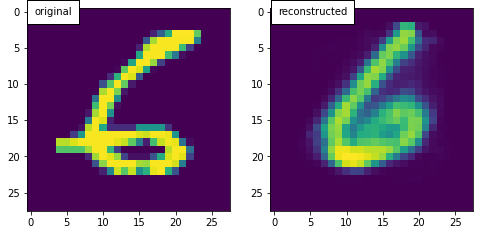

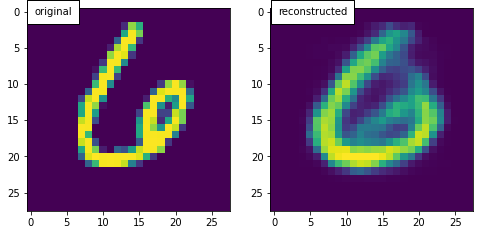

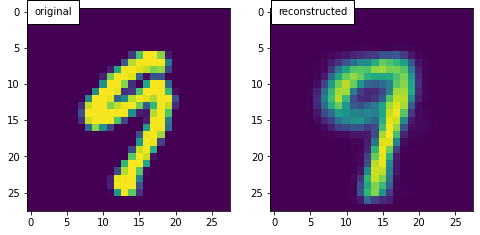

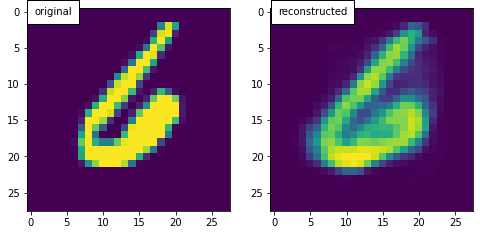

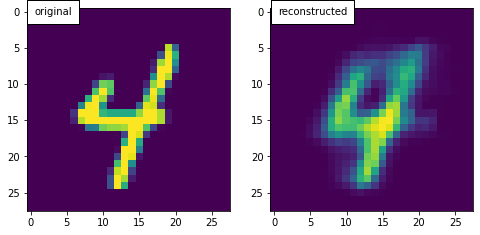

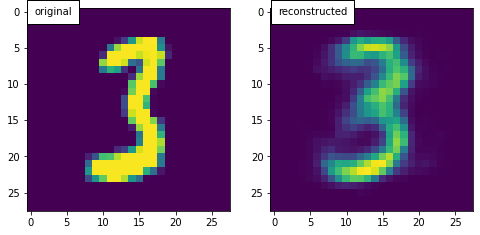

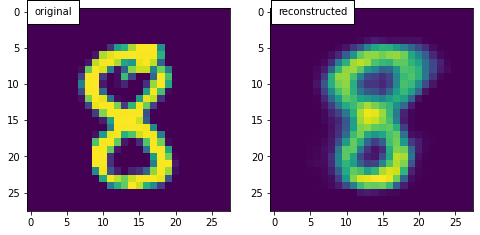

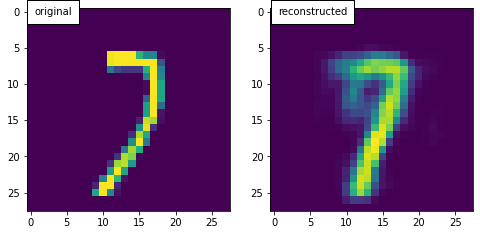

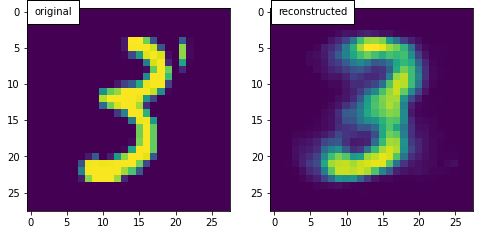

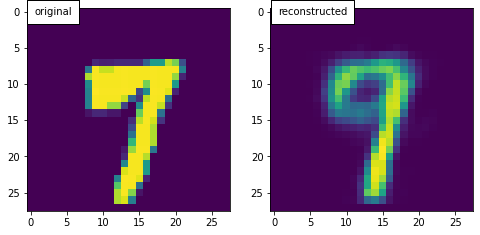

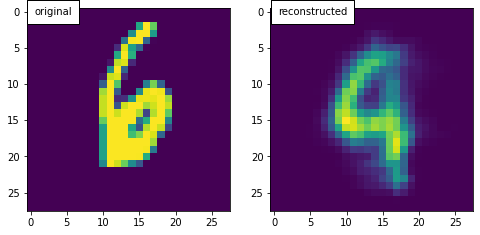

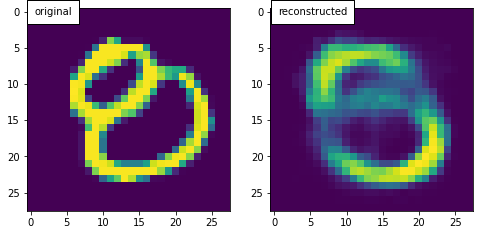

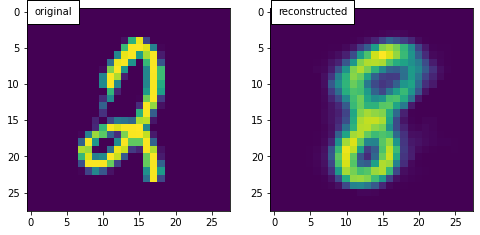

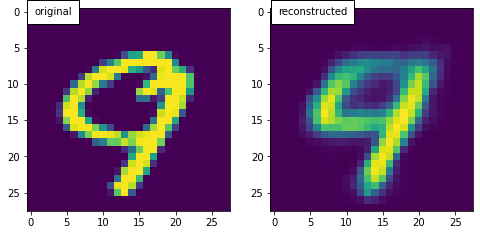

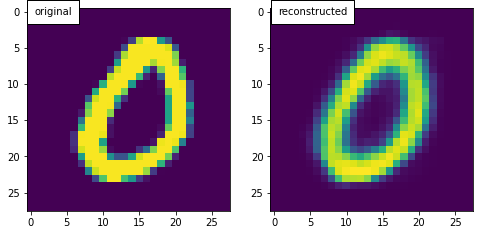

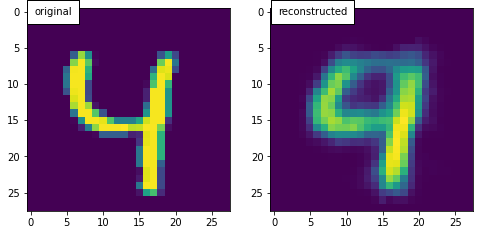

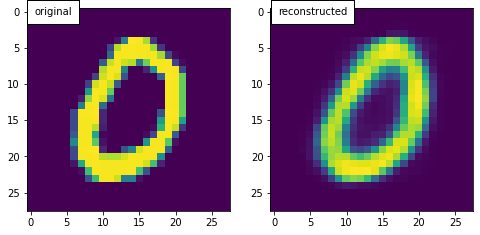

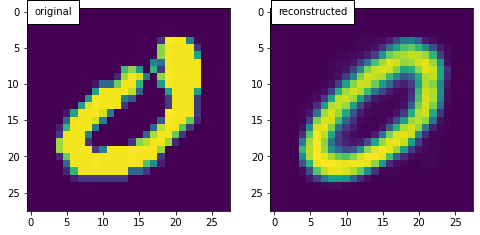

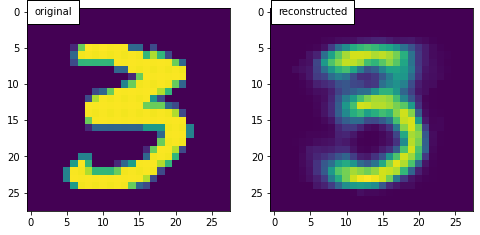

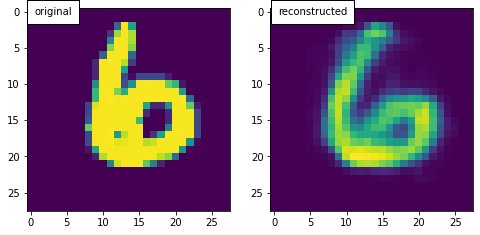

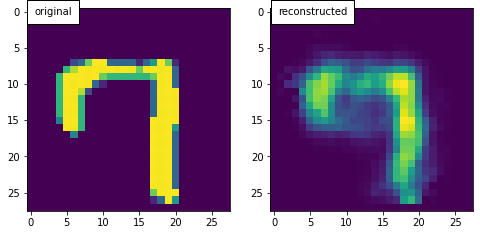

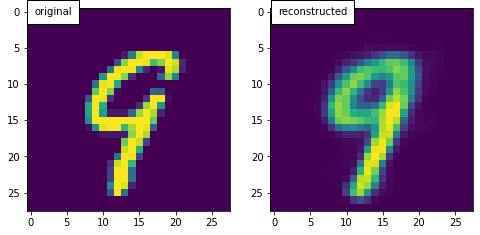

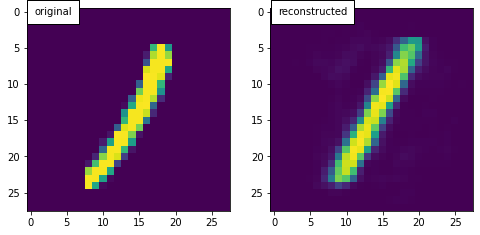

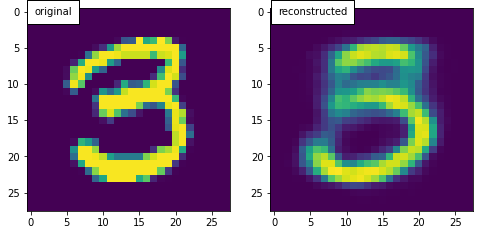

EPOCH 2


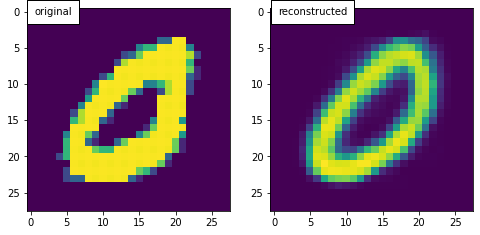

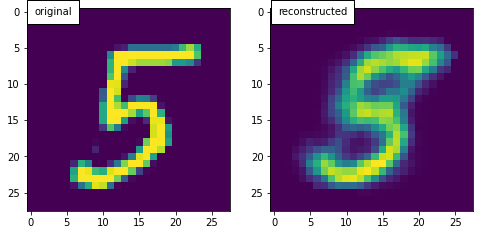

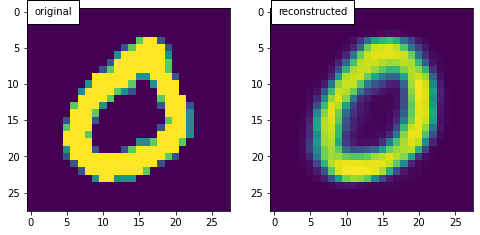

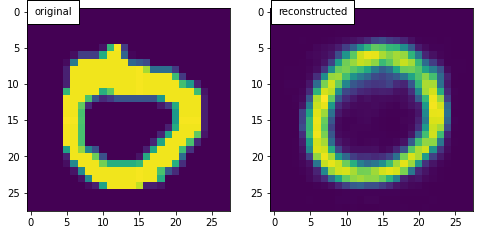

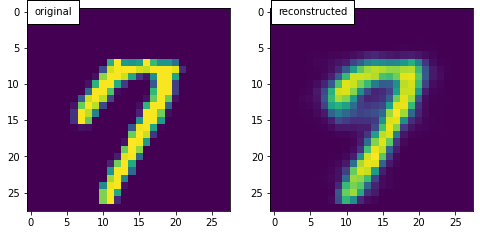

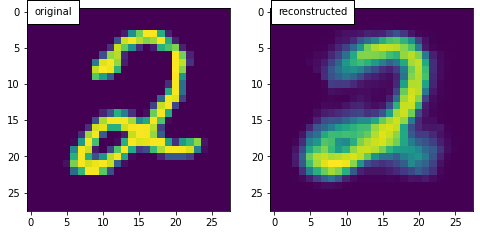

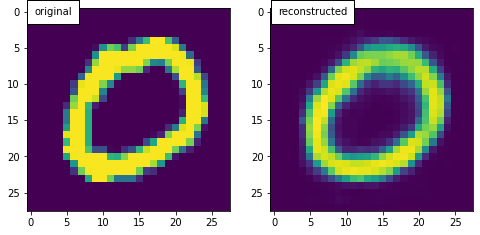

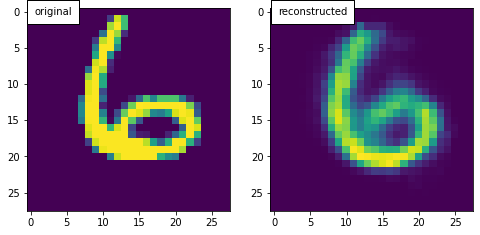

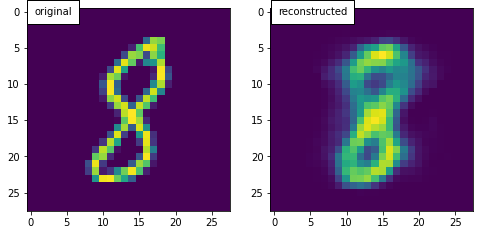

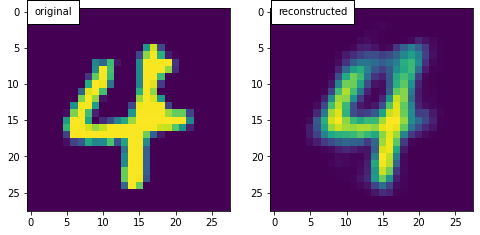

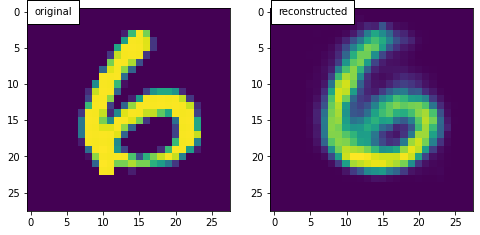

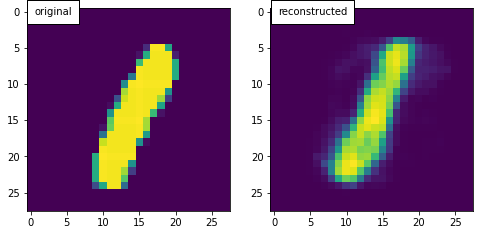

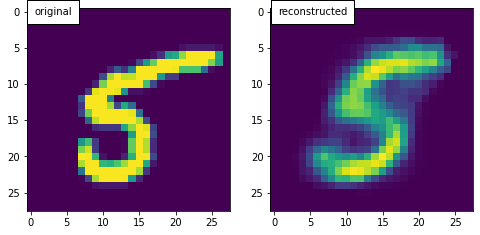

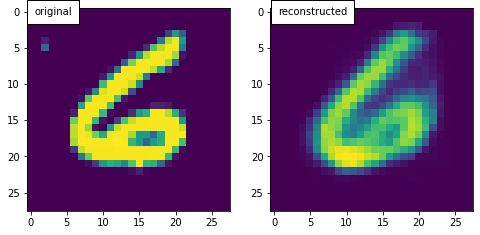

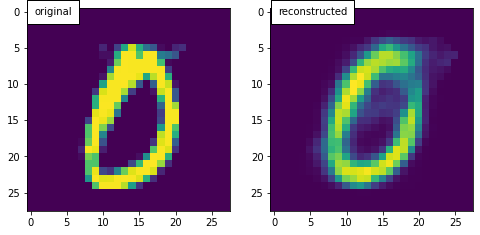

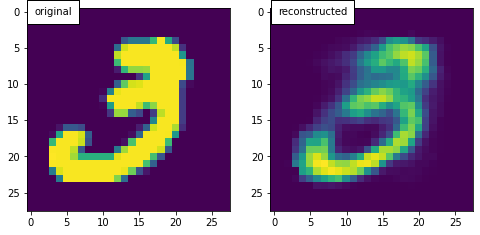

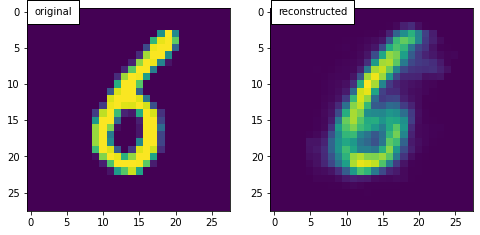

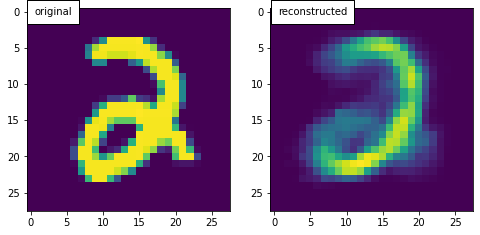

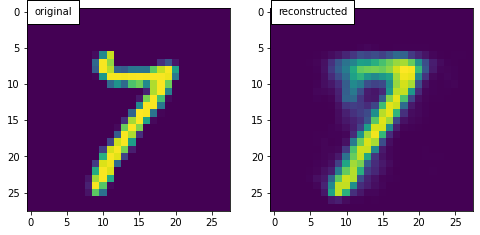

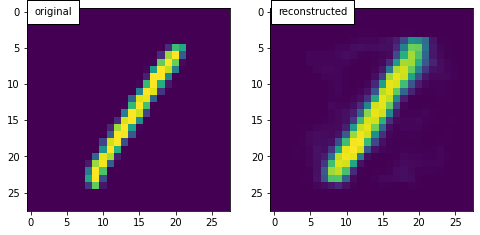

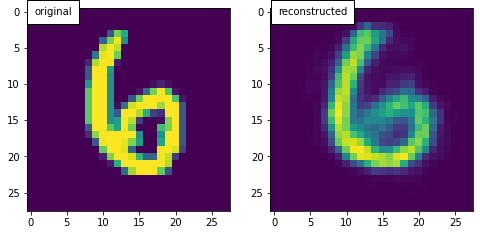

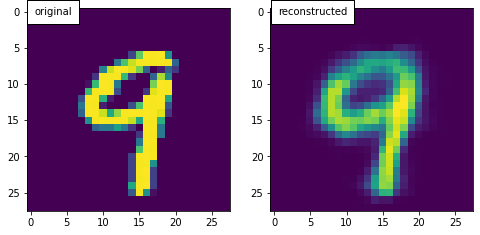

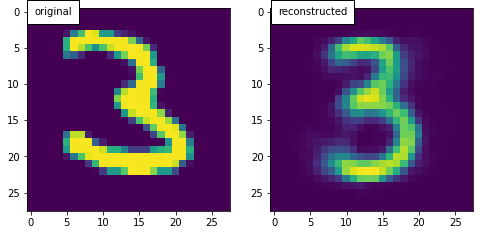

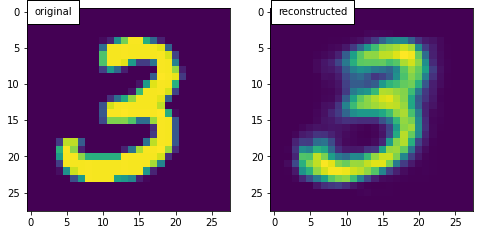

EPOCH 3


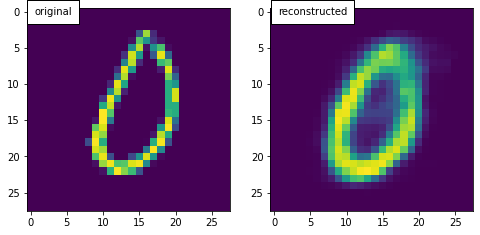

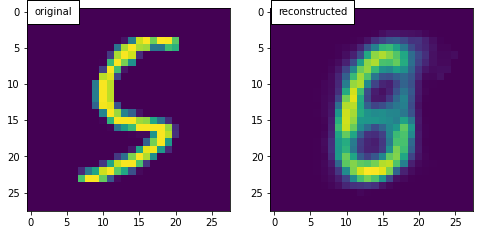

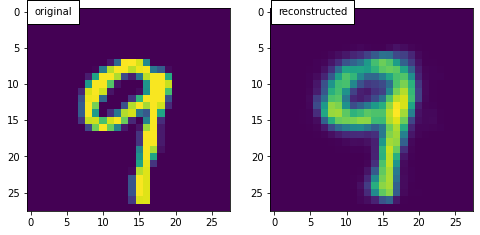

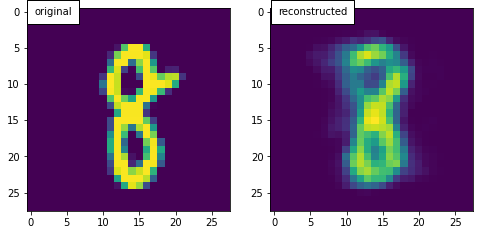

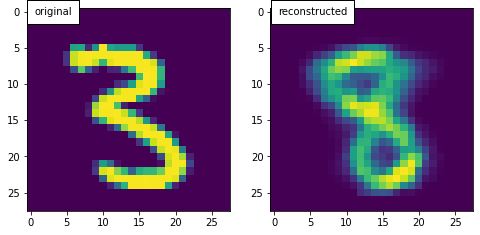

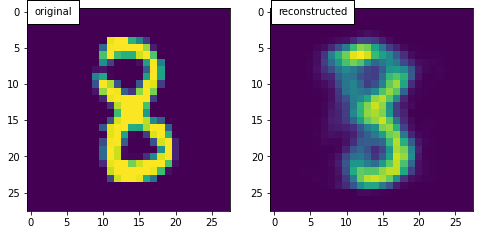

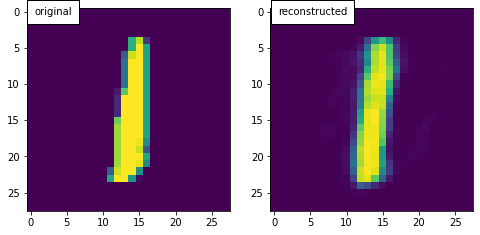

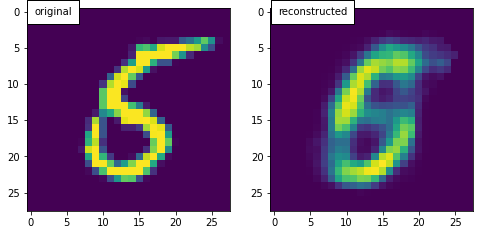

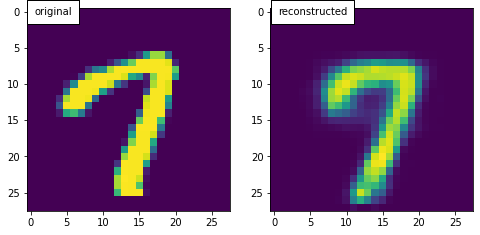

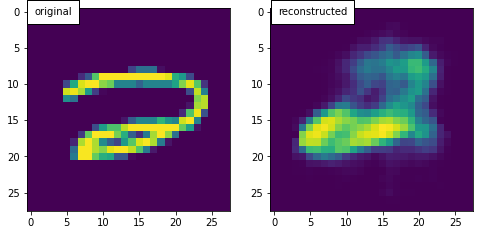

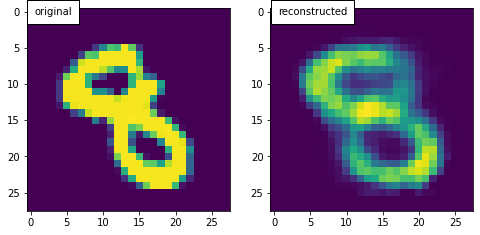

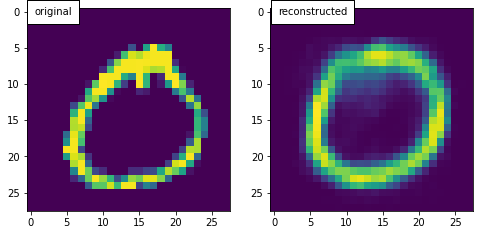

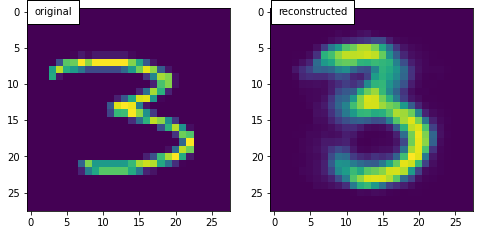

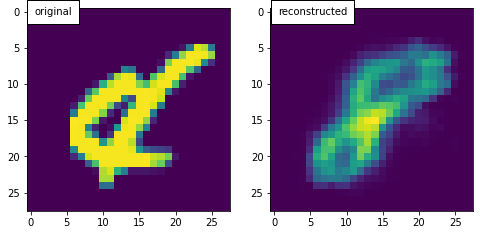

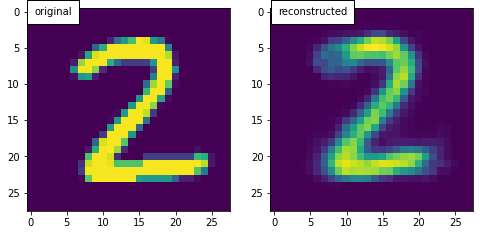

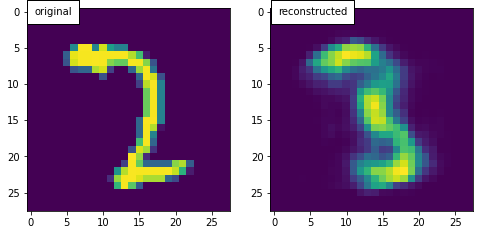

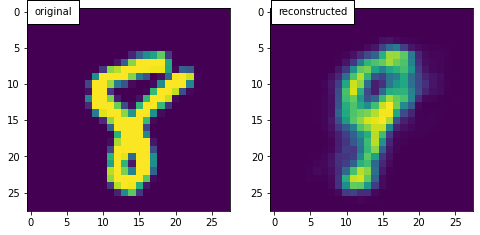

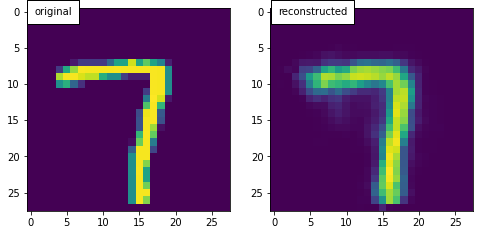

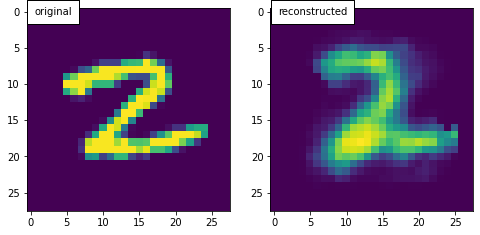

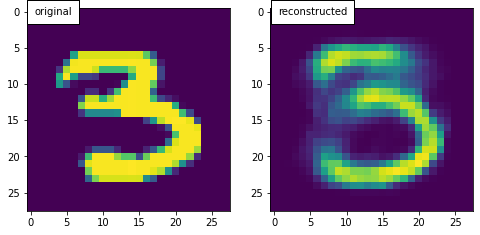

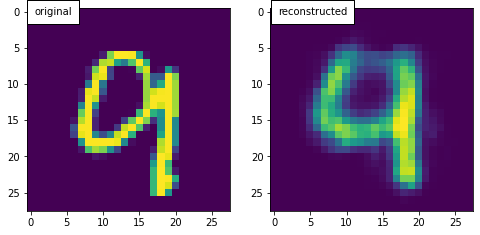

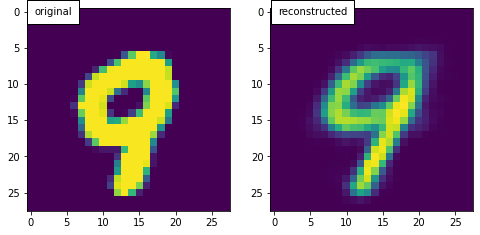

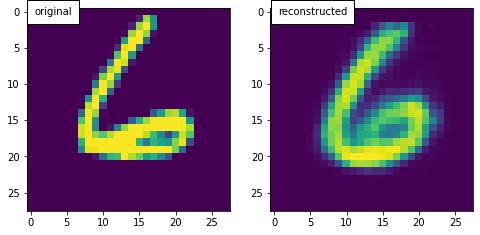

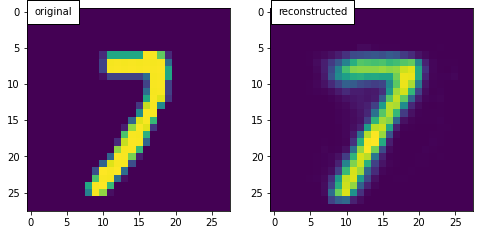

EPOCH 4


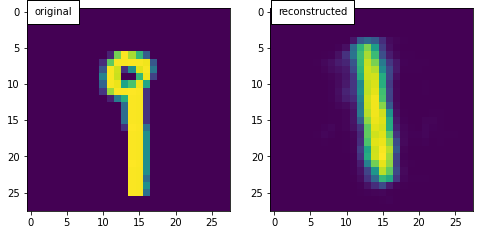

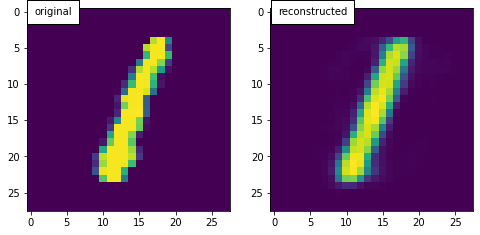

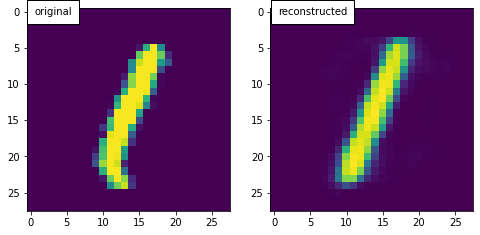

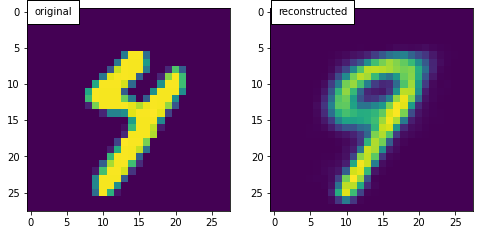

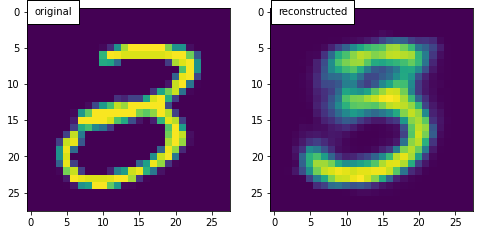

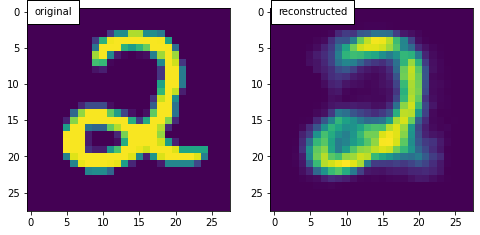

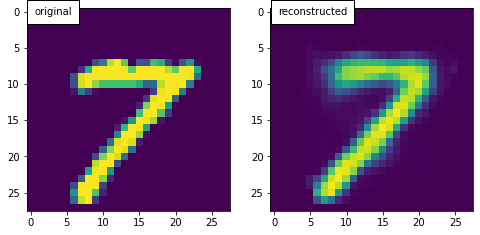

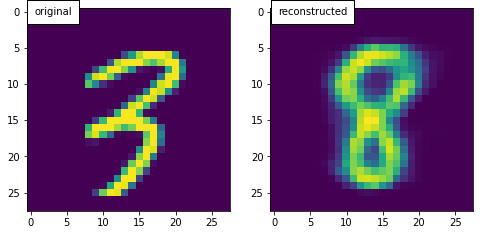

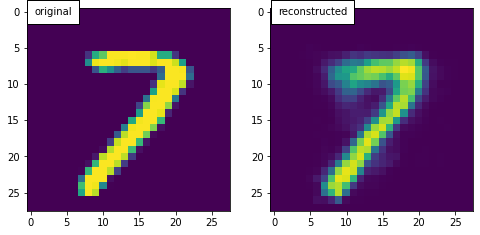

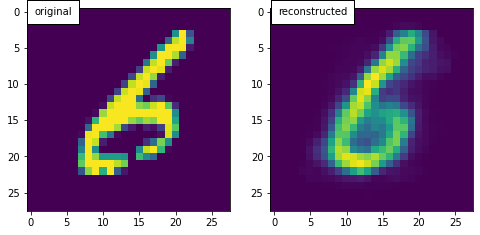

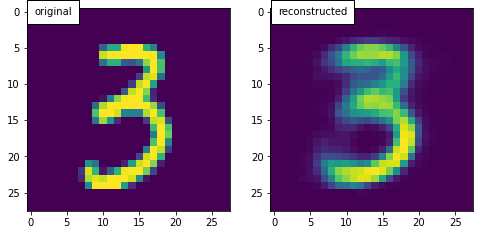

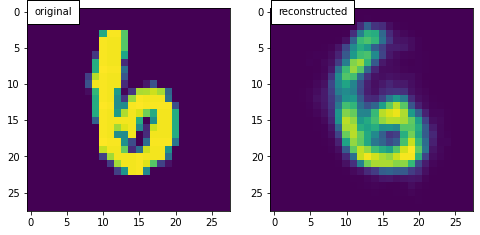

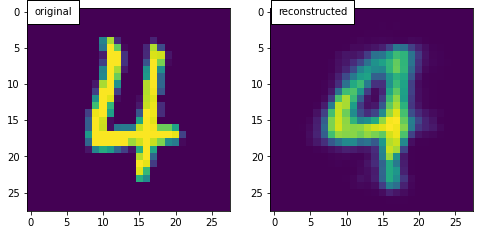

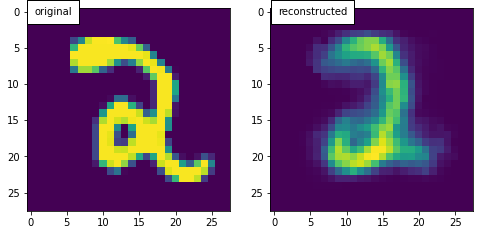

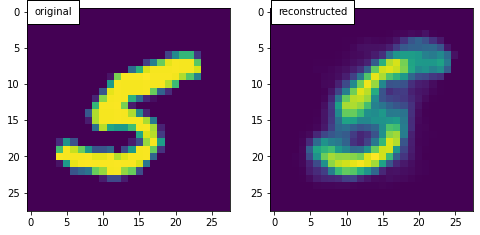

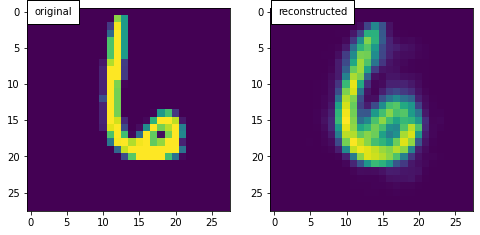

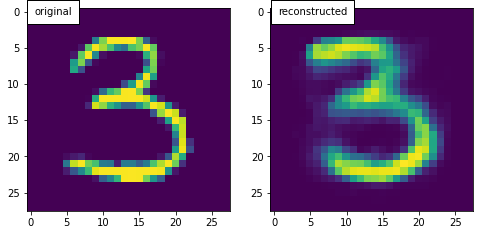

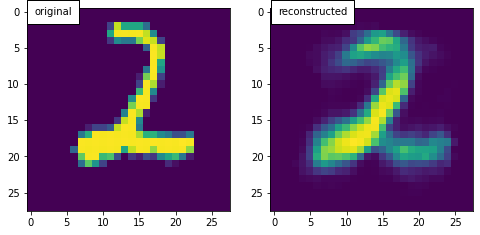

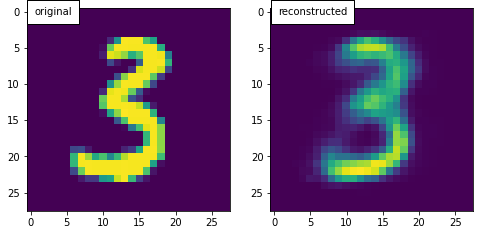

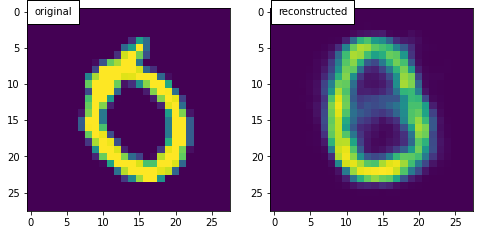

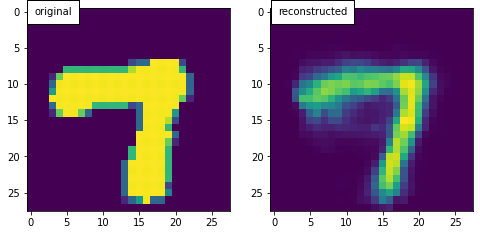

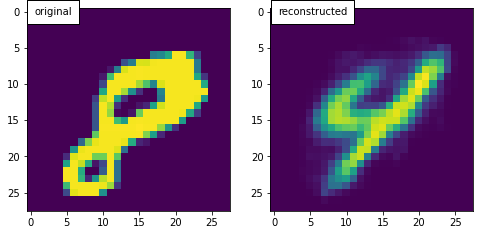

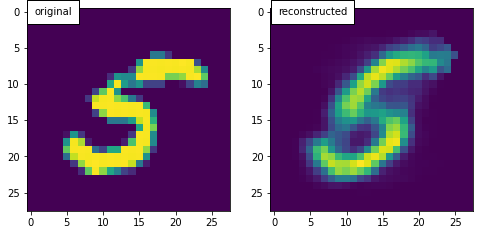

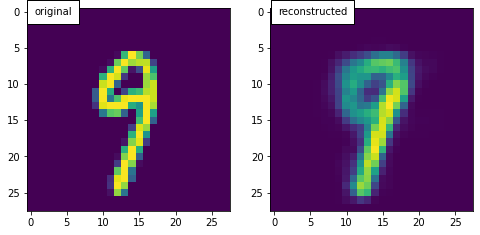

EPOCH 5


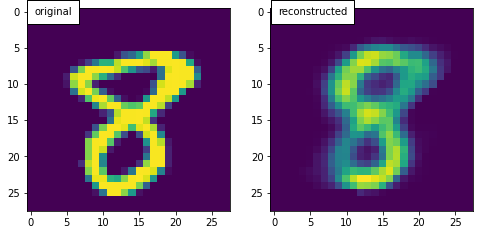

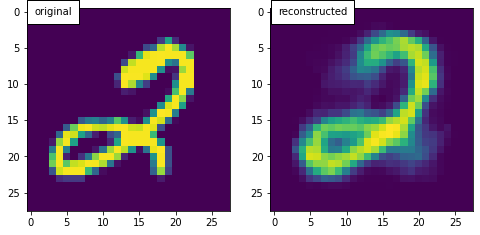

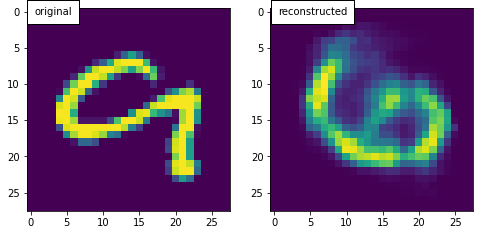

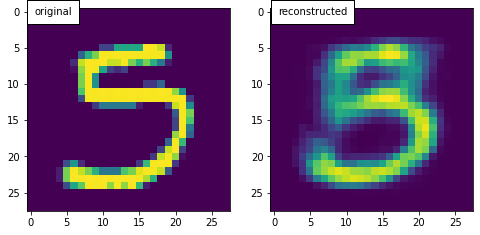

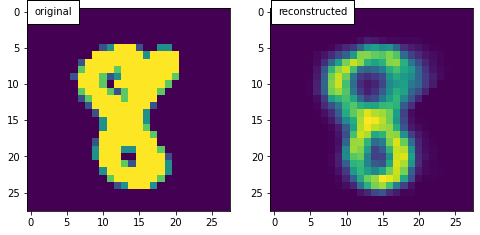

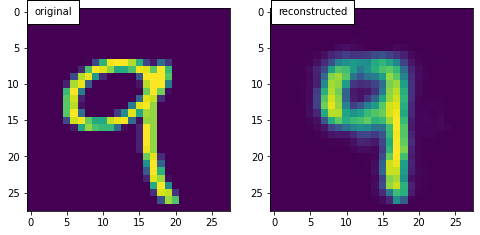

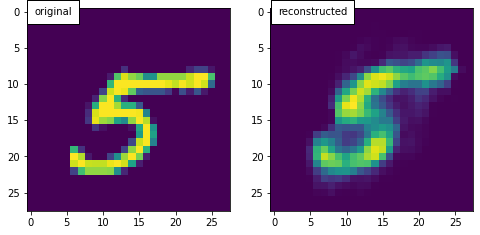

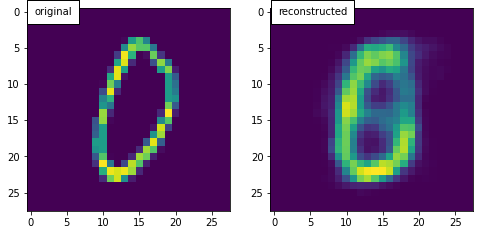

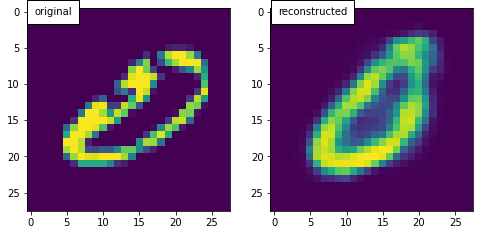

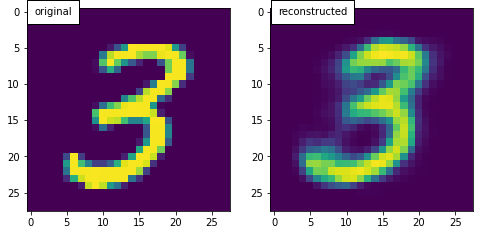

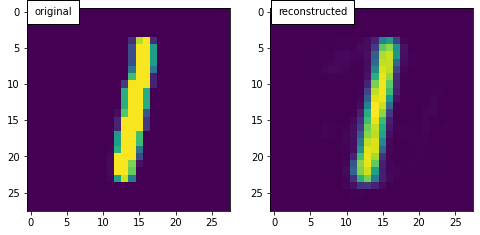

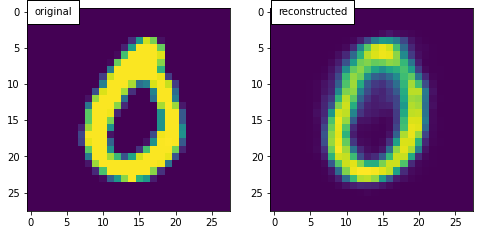

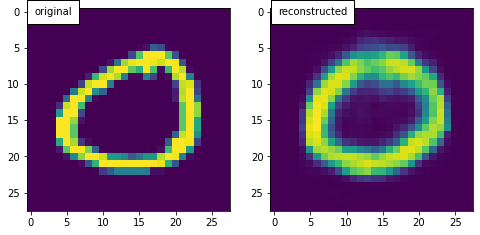

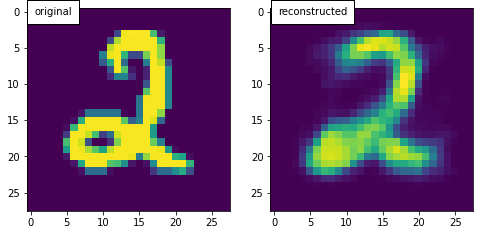

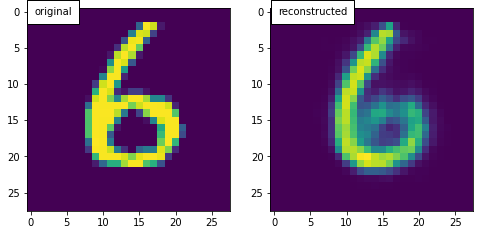

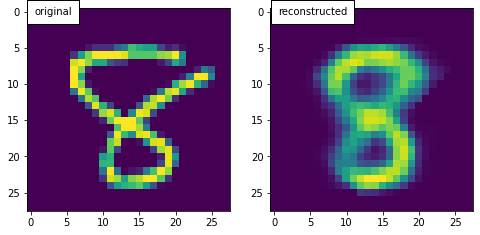

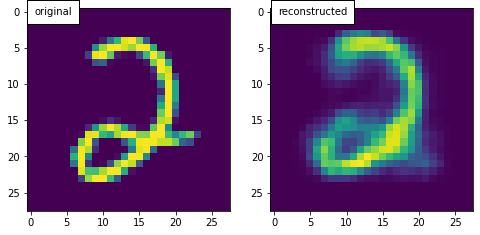

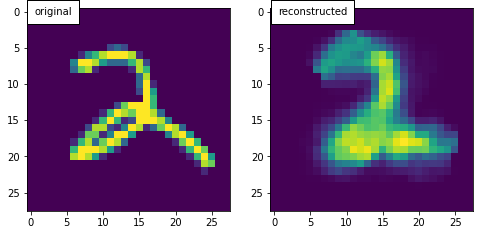

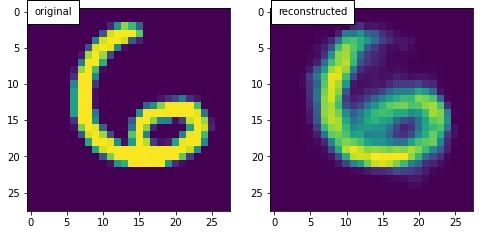

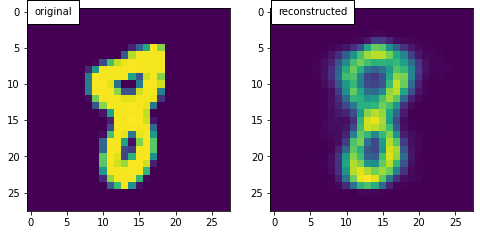

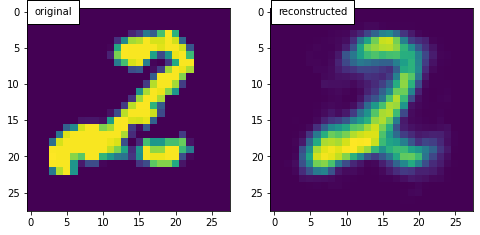

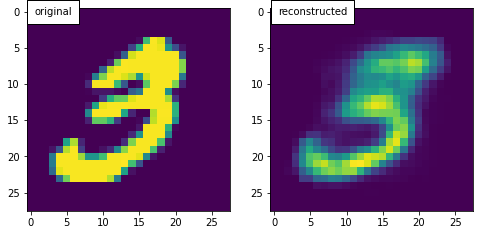

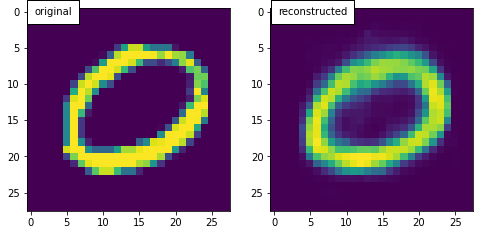

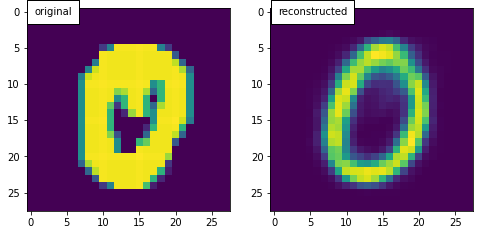

In [59]:
for i in range(EPOCH):
    print(f'EPOCH {i+1}')
    train(train_loader, autoencoder, loss_fn, optim)
    plt.show()

torch.Size([1, 28, 28])


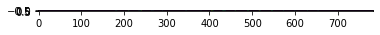

In [17]:
testx, testy = test_data[15][0], test_data[15][1]

np_testx = testx[0].numpy()
print(testx.shape)
plt.imshow(np_testx)
decoded = autoencoder(testx.view(-1, 28*28))
# argmax_pred_y = torch.argmax(test_pred_y)
plt.imshow(decoded[0].data.numpy())
